In [469]:
# Import packages
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle


In [470]:
#Read data
df = pd.read_csv('/Users/User/OneDrive/Desktop/Employee retention/HR_comma_sep.csv')

In [471]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [472]:
df.shape

(14999, 10)

## Data exploration

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [474]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [475]:
#check column name
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [476]:
#Rename column names
df = df.rename(columns={'Work_accident':'work_accident',
                        'average_montly_hours':'average_monthly_hours',
                        'time_spend_company':'tenure',
                        'Department':'department'})

In [477]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [478]:
#Check for NaN values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [479]:
#Check for duplicated rows
df.duplicated().sum()

3008

In [480]:
# Inspect some rows containing duplicates as needed
duplicates = df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist())
duplicates.head(20)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
30,0.09,0.62,6,294,4,0,1,0,accounting,low
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
71,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
652,0.09,0.77,6,290,4,0,1,0,technical,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
14863,0.09,0.77,6,290,4,0,1,0,technical,medium
278,0.09,0.78,6,254,4,0,1,0,support,low


In [481]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df.drop_duplicates(keep='first')

#keep='first': Keep the first occurrence of each duplicated row and remove subsequent occurrences.
#keep='last': Keep the last occurrence of each duplicated row and remove previous occurrences.
#keep=False: Remove all occurrences of duplicated rows, keeping none.

In [482]:
df.duplicated().sum()

0

In [483]:
df.shape

(11991, 10)

In [484]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
tenure                     int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [485]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

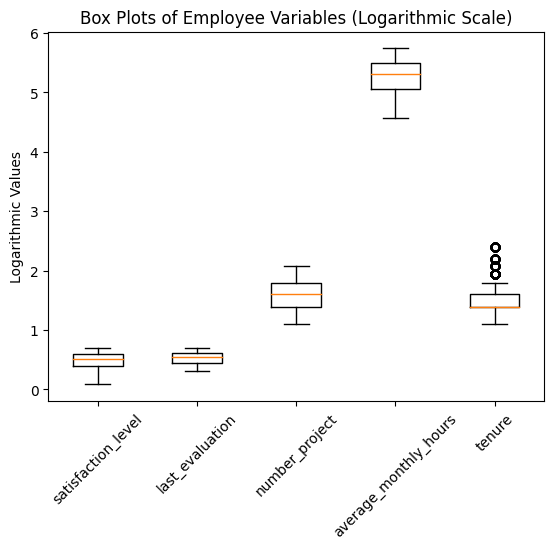

In [486]:
#List of variables for which you want to create box plots
variables = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure']

# Apply logarithmic transformation to the variables
df_log = np.log1p(df[variables])

# Create a figure and axis object
fig, ax = plt.subplots()

# Create a box plot for each variable
ax.boxplot(df_log.values)

# Set x-axis tick labels
ax.set_xticklabels(variables, rotation=45)

# Set y-axis label
ax.set_ylabel('Logarithmic Values')

# Set plot title
ax.set_title('Box Plots of Employee Variables (Logarithmic Scale)')

# Show the plot
plt.show()


In [487]:
#The boxplot above shows that there are outliers in the tenure variable.
#It would be helpful to investigate how many rows in the data contain outliers in the tenure column.

# Determine the number of rows containing outliers 

#Compute the 25th percentile value in 'tenure'
percentile25 = df['tenure'].quantile(0.25)
# Compute the 75th percentile value in `tenure`
percentile75 = df['tenure'].quantile(0.75)
# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df[(df['tenure'] > upper_limit) | (df['tenure'] < lower_limit)]
# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


In [488]:
#Robust Models: Some machine learning algorithms, such as tree-based models (e.g., Random Forest, XGBoost), are inherently robust to outliers. In such cases, removing outliers may not be necessary.

In [489]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Check relationship between number of projects and average monthly. Also , the impact of these on employees leaving

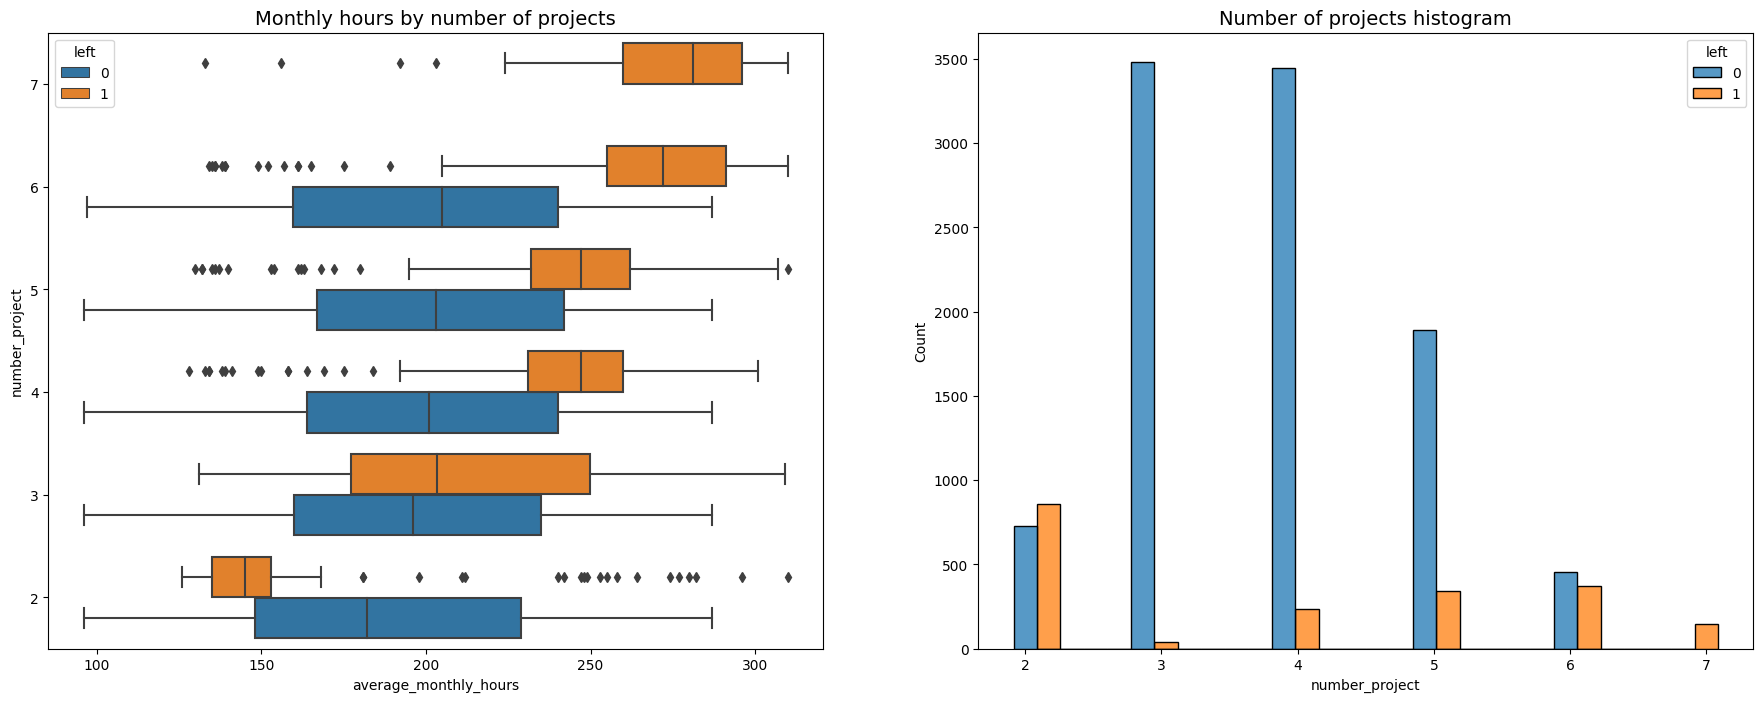

In [490]:
## Create a boxplot to show the relationship between number_project + average_monthly_hours(also to see the relationship with people who left the company)

# Create a plot as needed 
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
sns.histplot(data=df, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

## Check relationship between average-monthly hours and satisfaction level

In [491]:
##Make an assumption on the average working hour for workers working from monday to friday

#Assumption:
#40hours per week
#2 weeks vacation
#365/7 = 52 weeks
#52 - 2 week = 50 week per year
#50 week * 40 hours per week / 12 months = 166.67 hours per week

average_working_hours = 50*40/12
average_working_hours

166.66666666666666

Text(0.5, 1.0, 'Monthly hours by satisfaction level')

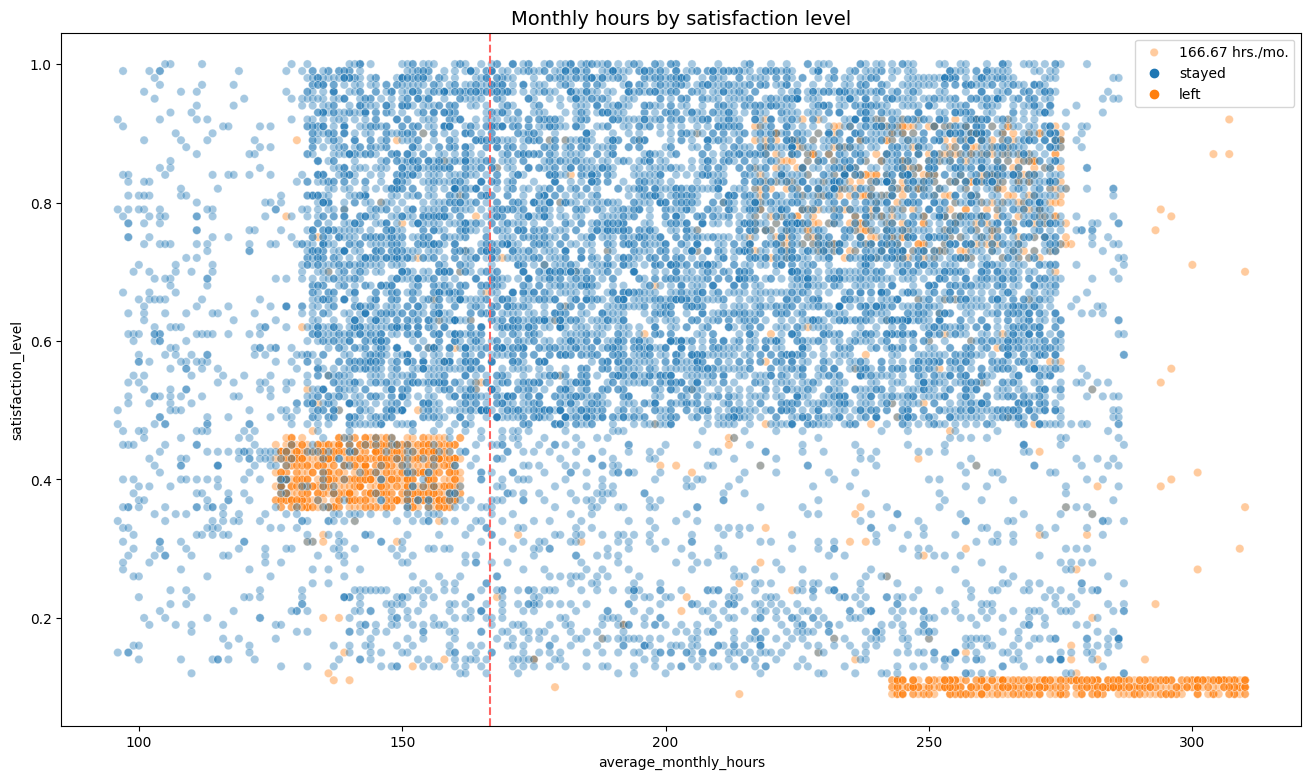

In [492]:
# Create a plot as needed 
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4) #alpha = transparency
plt.axvline(x=average_working_hours, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])    
plt.title('Monthly hours by satisfaction level', fontsize='14')

## Check relationship between satisfaction and tenure

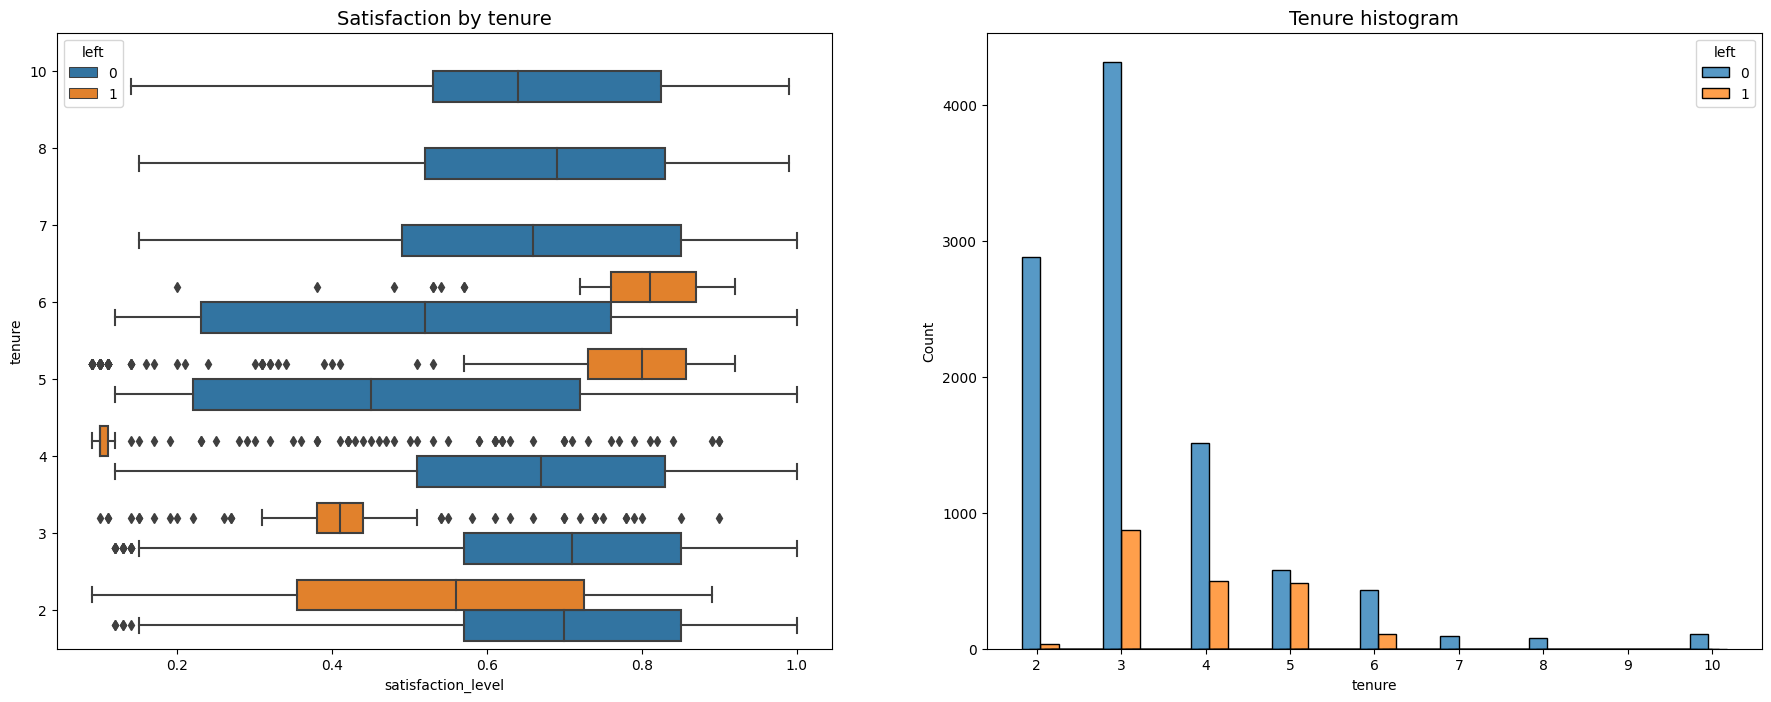

In [493]:
#Plot a boxplot and histogram

#Set figure and axes
fig,ax = plt.subplots(1,2, figsize=(22,8))

#Create box-plot 
sns.boxplot(data=df, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

#Create histogram 
sns.histplot(data=df, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_xticks([2,3,4,5,6,7,8,9,10])
ax[1].set_title('Tenure histogram', fontsize='14')
plt.show()

In [494]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


## Investigate relationship between salary and tenure

Text(0.5, 1.0, 'Salary histogram by tenure: long-tenured people')

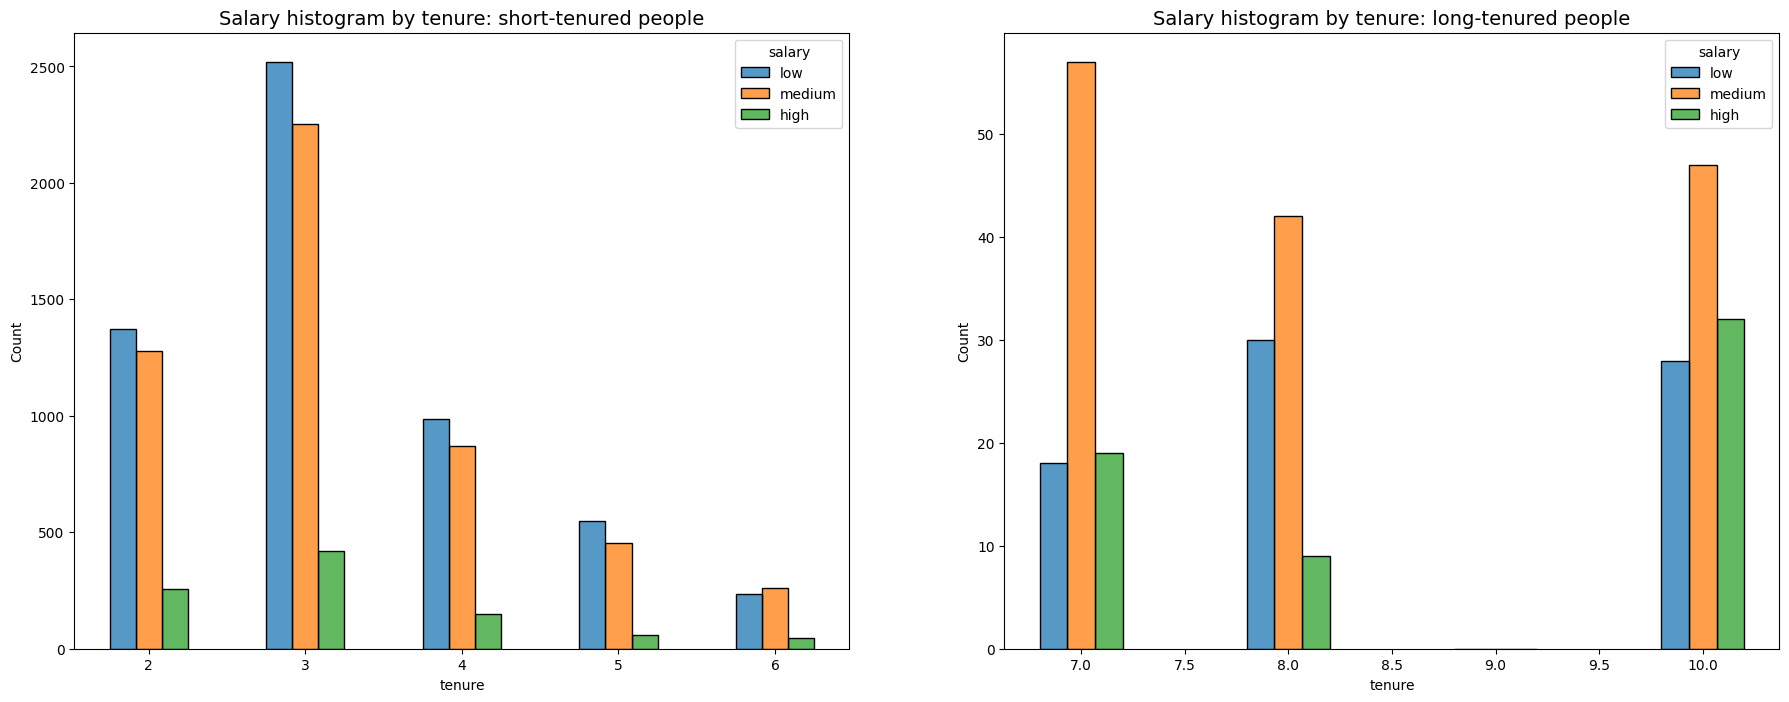

In [495]:
# Create a plot as needed 

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df[df['tenure'] < 7]

# Define long-tenured employees
tenure_long = df[df['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14')

## Explore relationship between monthly hours and last_evaluation (see whether higher hours result in better evaluation)

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

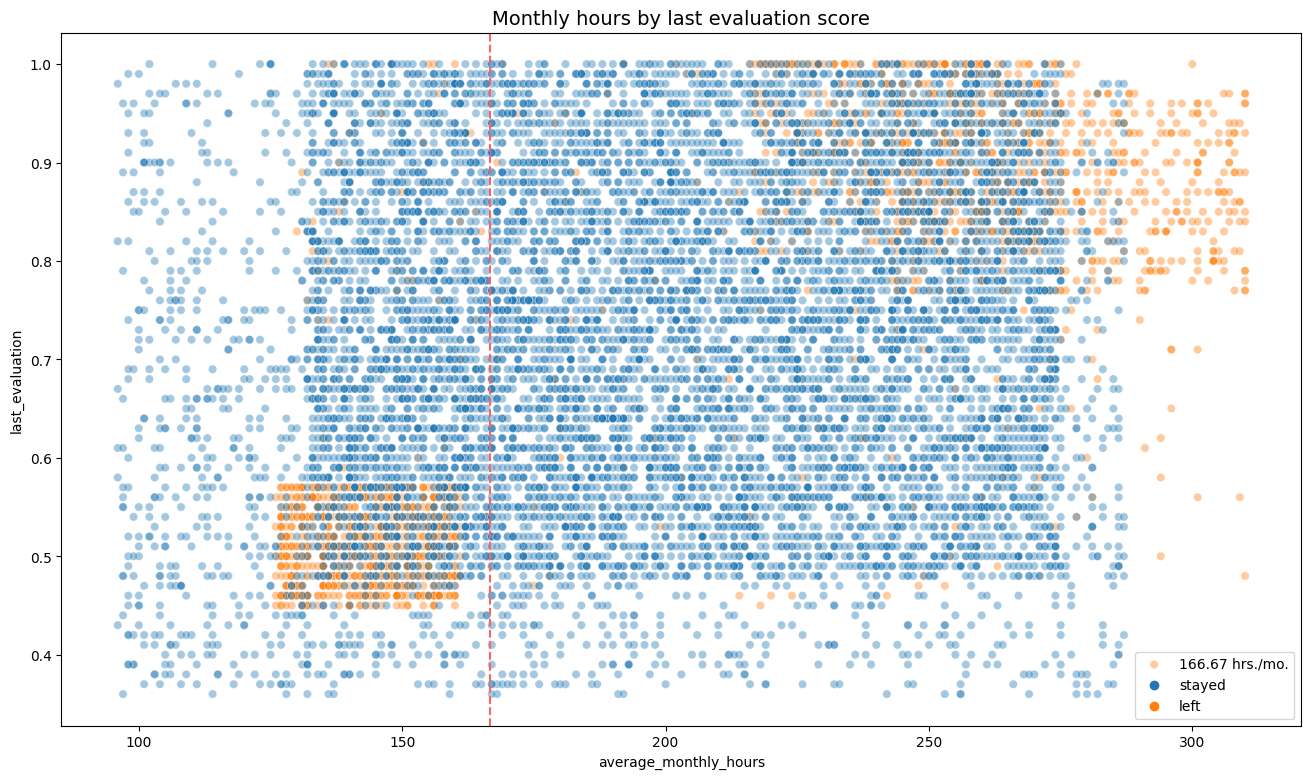

In [496]:
#Create a scatter plot
plt.figure(figsize=(16,9))
sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=average_working_hours, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])    
plt.title('Monthly hours by last evaluation score', fontsize='14')

## Examine relationship between average_monthly_hours and promotion last 5 years

Text(0.5, 1.0, 'Monthly hours by promotion last 5 years')

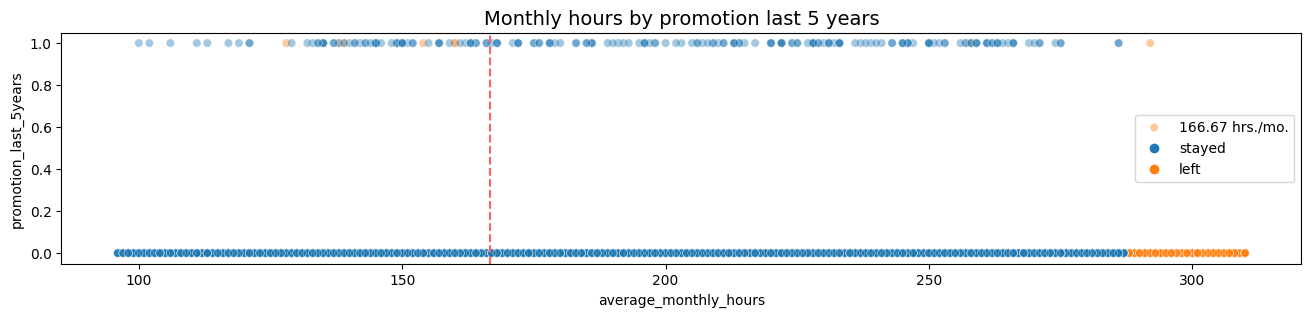

In [497]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14')

## Display which department has the higher turnover rate

In [498]:
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [499]:
# Display counts for each department
normalize_value = df[["department", 'left']].value_counts(normalize=True).sort_index() * 100
normalize_value


department   left
IT           0        6.821783
             1        1.317655
RandD        0        5.078809
             1        0.708865
accounting   0        4.269869
             1        0.909015
hr           0        4.069719
             1        0.942373
management   0        3.202402
             1        0.433659
marketing    0        4.678509
             1        0.934034
product_mng  0        4.803603
             1        0.917355
sales        0       22.425152
             1        4.586773
support      0       12.584438
             1        2.601951
technical    0       15.461596
             1        3.252439
dtype: float64

Text(0.5, 1.0, 'Counts of stayed/left by department')

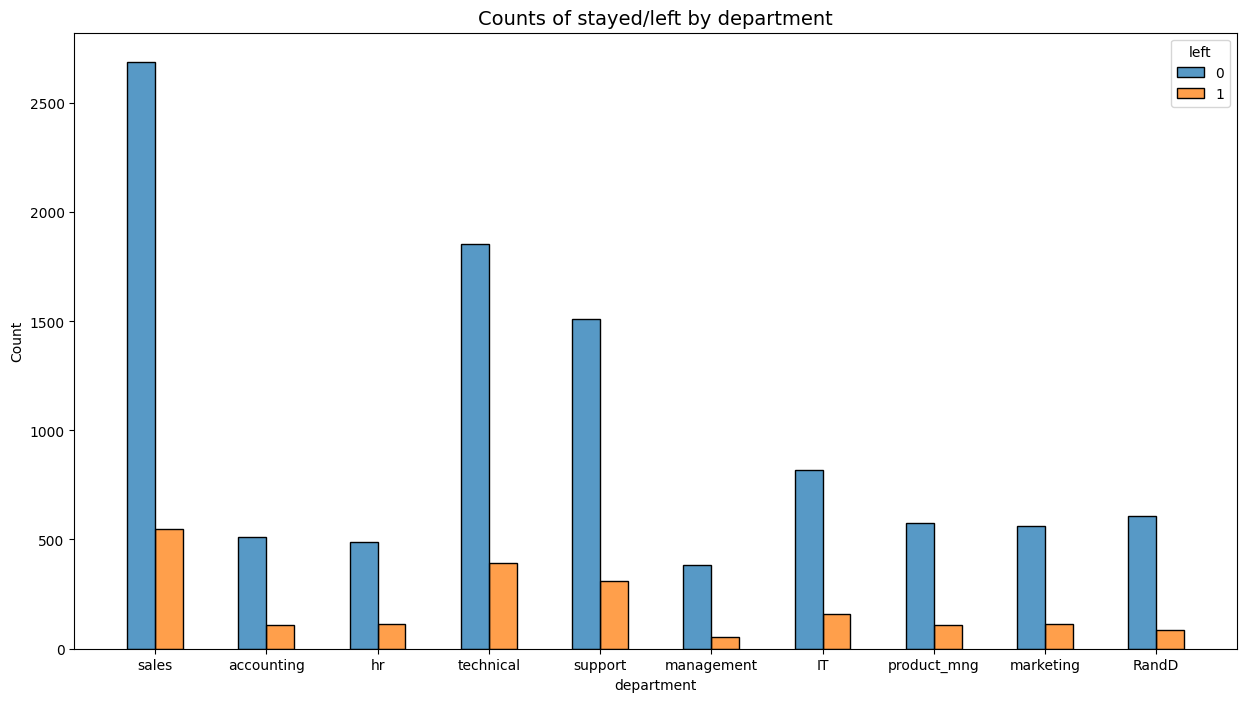

In [500]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='department', hue='left', hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='horizontal')
plt.title('Counts of stayed/left by department', fontsize=14)

In [501]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
tenure,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_23816\440791763.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True),mask=matrix)


Text(0.5, 1.0, 'Correlation Heatmap')

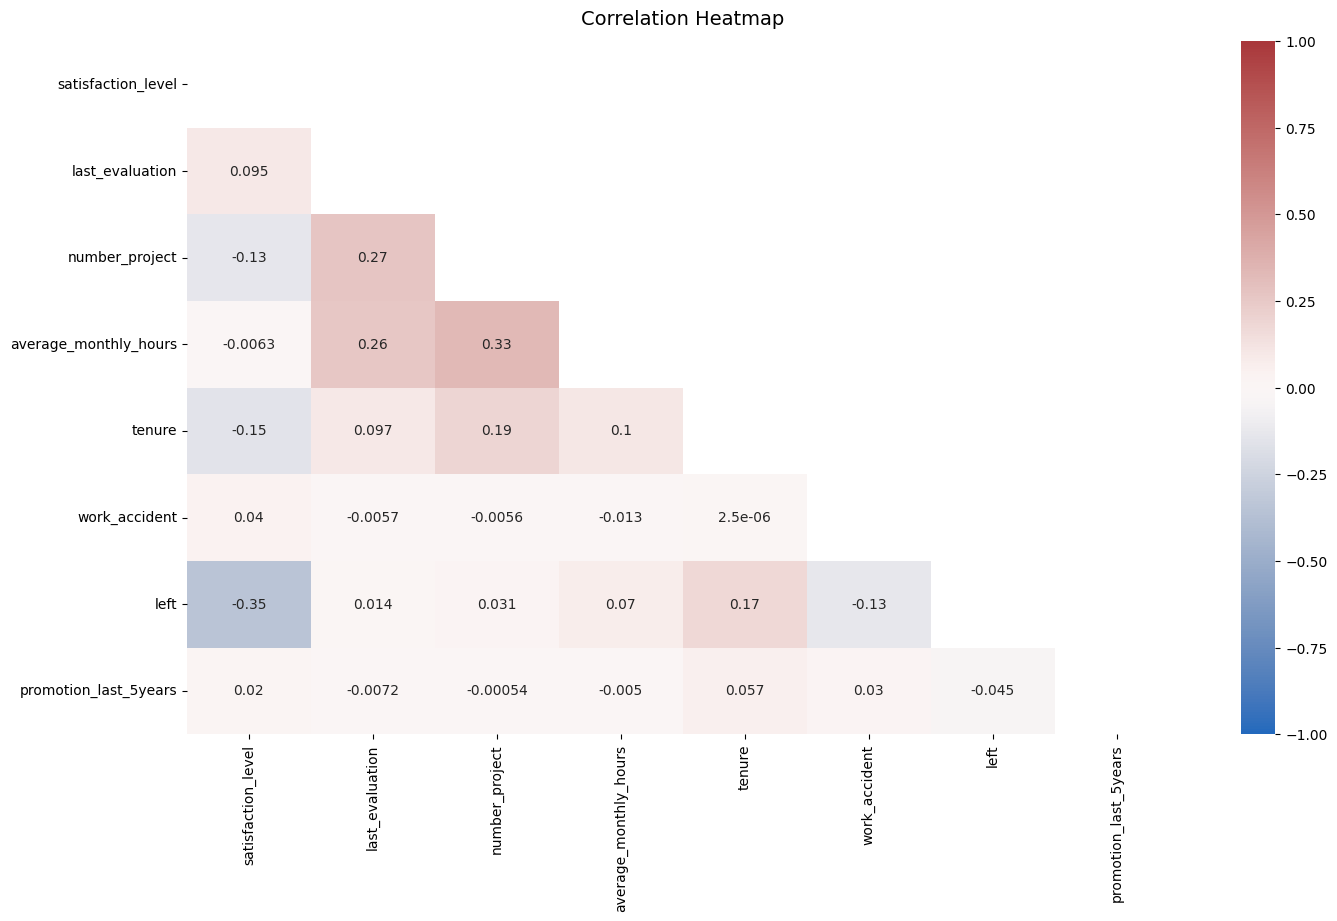

In [502]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
matrix = np.triu(corr_matrix)
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True),mask=matrix)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

## First modelling using logistic regression model

In [503]:
##Check dtypes before modelling. Needs to convert categorical to numeric before modelling logistic regression
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
tenure                     int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [504]:
#Use one hot encoding for categorical data
df_dummies = pd.get_dummies(df, columns=['salary','department'], drop_first=True )

In [505]:
df_dummies

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary_low,salary_medium,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,0,0,0,0,0,1,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,0,0,0,0,0,1,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,0,0,0,0,0,1,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,0,0,0,0,0,0,1,0,0,0,0


## Logisitc regression is sensitive to outliers, so it is necessary to remove them

In [506]:
df_log = df_dummies[(df_dummies['tenure'] >= lower_limit) & (df_dummies['tenure'] <= upper_limit)]
df_log

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary_low,salary_medium,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,0.72,0.64,4,192,3,0,0,0,0,1,0,0,0,0,0,0,1,0,0
11986,0.48,0.50,5,142,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0
11987,0.19,0.79,4,229,4,0,0,0,0,1,0,0,0,0,0,1,0,0,0
11992,0.62,0.85,3,237,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [507]:
## Set y and X variables
y = df_log['left']
X = df_log.copy()
X = X.drop('left', axis=1)



In [508]:
#Check balance of the dataset
df_log['left'].value_counts(normalize=True)

#Since it is not balance, we will use stratify=y

0    0.831468
1    0.168532
Name: left, dtype: float64

In [509]:
#Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, stratify=y, random_state=42)

In [510]:
#Construct a logistic regression model and fit it using the training data
log_clf = LogisticRegression(random_state=42, max_iter=500)
log_clf.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=42)

In [511]:
#Test the model on the testing data
y_pred = log_clf.predict(X_test)

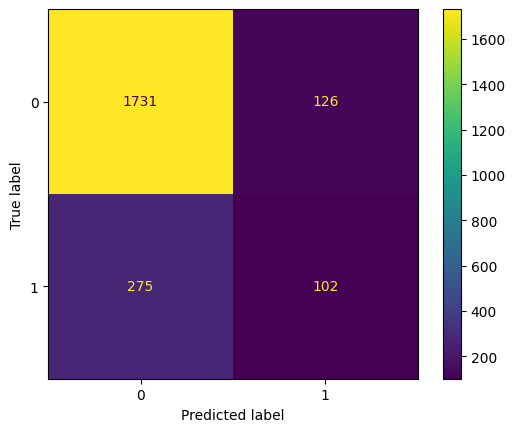

In [512]:
#Create confusion matrix of the prediction
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

#True negatives: The number of people who did not leave that the model accurately predicted did not leave.

#False positives: The number of people who did not leave ,the model inaccurately predicted as leaving.

#False negatives: The number of people who left that the model inaccurately predicted did not leave

#True positives: The number of people who left the model accurately predicted as leaving

#A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

In [513]:
#Check metrics of the model
print('Accuracy:', '%.3f' % accuracy_score(y_test, y_pred))
print('Precision:', '%.3f' % precision_score(y_test,y_pred))
print('Recall:', '%.3f' % recall_score(y_test, y_pred))
print('F1 Score:', '%.3f' % f1_score(y_test, y_pred))




Accuracy: 0.821
Precision: 0.447
Recall: 0.271
F1 Score: 0.337


## 2nd modelling using tree-based model 

In [514]:
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [515]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
tenure                     int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [516]:
#Use one hot encoding for categorical data
df_dummies2 = pd.get_dummies(df, columns=['salary','department'], drop_first=True)
df_tree = df_dummies.copy()
df_tree

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary_low,salary_medium,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,0,0,0,0,0,1,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,0,0,0,0,0,1,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,0,0,0,0,0,1,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [517]:
#Set y and X variable
y = df_tree['left']
X = df_tree.copy()
X = X.drop('left', axis=1)
X.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary_low,salary_medium,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,0,1,0,0


In [518]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Create train & validate data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

#Test Data: The test data set is used to evaluate the final performance of the selected model. 
#It provides an unbiased estimate of how well the model is expected to perform on unseen data. 
#The test data is typically not used during the model selection process and is kept separate until the final evaluation stage.

#Train & Validate Data: The train and validate data sets are used for model selection, hyperparameter tuning, and performance evaluation during the model development process. 
#The train data set is used to train and fit the models, while the validate data set is used to assess their performance and select the best model.


## Decision Tree 

In [519]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [520]:
#Fit the data into the validation dataset
tree1.fit(X_tr, y_tr)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'roc_auc', 'accuracy', 'recall', 'f1', 'precision'})

In [521]:
# Check best parameters
tree1.best_params_



{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [522]:
# Check best AUC score on CV
tree1.best_score_

#AUC = 1: Perfect classifier that can perfectly distinguish between the positive and negative classes.
#AUC > 0.5: Classifier performs better than random chance.
#AUC = 0.5: Classifier performs no better than random chance.
#AUC < 0.5: Classifier performs worse than random chance. It means the model is predicting the opposite of the true labels.

0.9702694937781765

In [523]:
def make_results(model_name, model_object, metric):

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                 'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'AUC': auc,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        },
                        ignore_index=True
                       )
  
    return table

In [524]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

#Decision tree is vulnerable to overfitting, hence we will validate again using random forest

C:\Users\User\AppData\Local\Temp\ipykernel_23816\844397710.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,AUC,Precision,Recall,F1,Accuracy
0,decision tree cv,0.970269,0.922102,0.920501,0.921274,0.973868


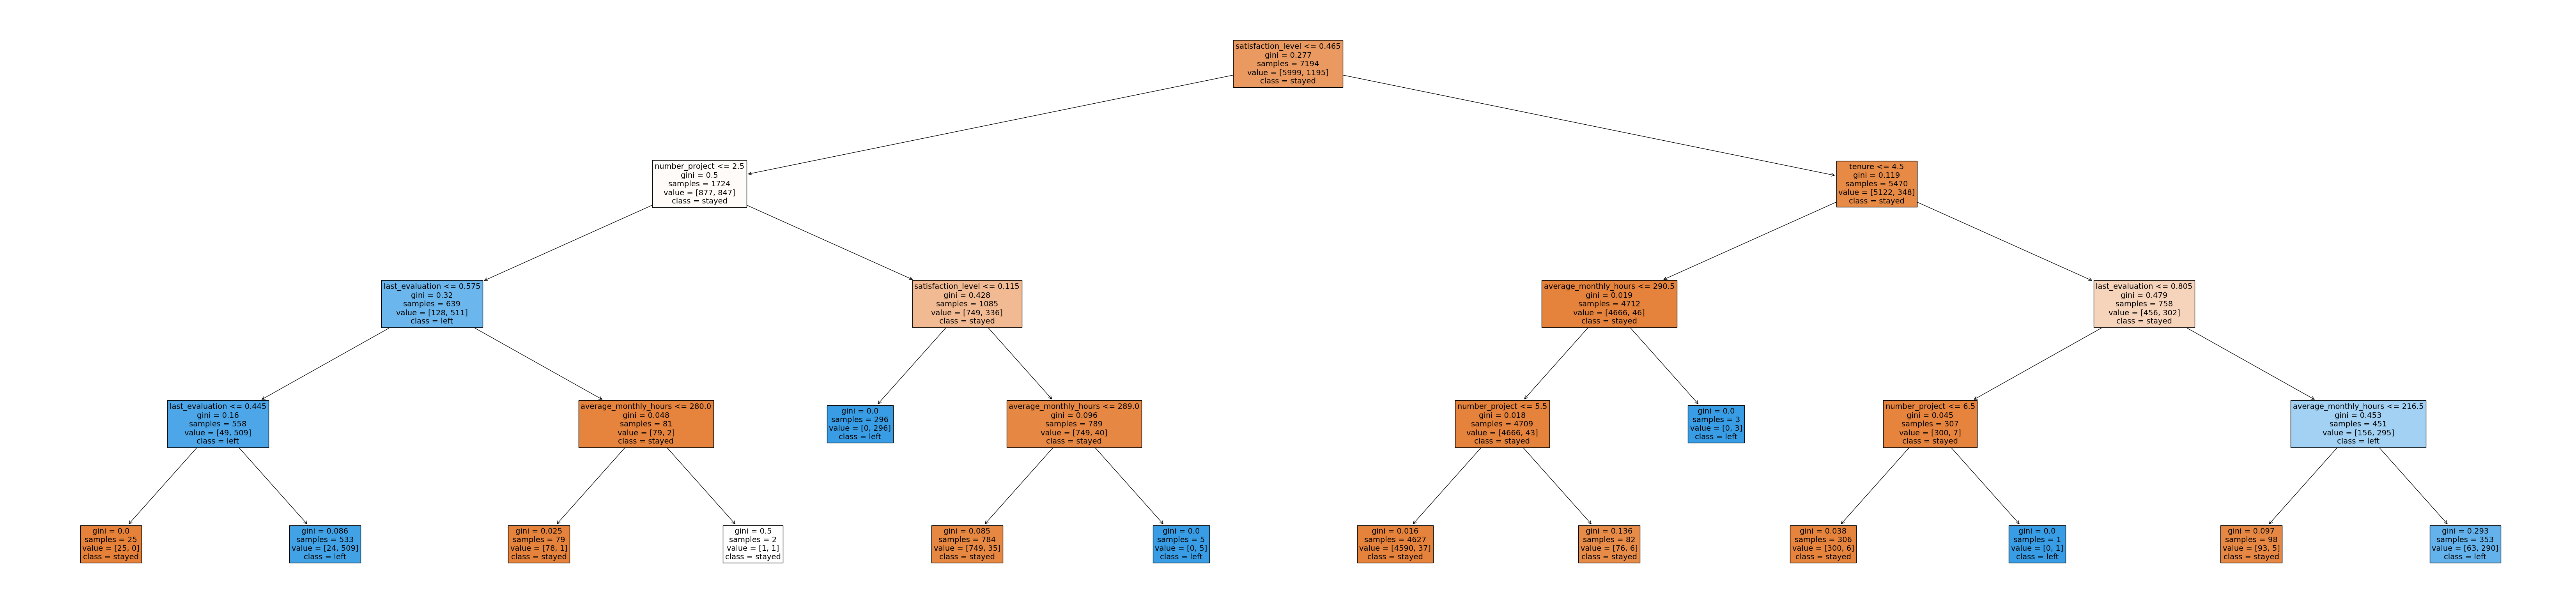

In [525]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree1.best_estimator_, max_depth=4, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True)
plt.show()

## Modelling using Random Forest CLF

In [526]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [527]:
#Fit the model to the validation dataset
#rf1.fit(X_tr, y_tr)

In [528]:
# Define a path to the folder where you want to save the model
path = '/Users/User/OneDrive/desktop/Employee retention/pickled model/'

In [529]:
#Pickle the model
#with open(path + 'hr_rf1.pickle', 'wb') as to_write:
    #pickle.dump(rf1, to_write)

# Open pickled model
with open(path+'hr_rf1.pickle', 'rb') as to_read:
    rf1 = pickle.load(to_read)

c:\Users\User\miniconda3\envs\aj\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.2.post1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\User\miniconda3\envs\aj\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.2.post1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\User\miniconda3\envs\aj\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.22.2.post1 when using version 1.2.2. This might le

In [530]:
# Check best AUC score on CV
rf1.best_score_

0.9795790967836983

In [531]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

In [532]:
# Get all CV scores
rforest_cv_results = make_results('Random Forest cv', rf1, 'auc')
rforest_cv_results

# Concatenate the random forest results to the master table
results = pd.concat([tree1_cv_results, rforest_cv_results])
results


C:\Users\User\AppData\Local\Temp\ipykernel_23816\844397710.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,AUC,Precision,Recall,F1,Accuracy
0,decision tree cv,0.970269,0.922102,0.920501,0.921274,0.973868
0,Random Forest cv,0.979579,0.943576,0.923021,0.933145,0.978037


## Modelling using XGboost

In [533]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)  

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12], 
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }   

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# 4. Instantiate the GridSearchCV object
xgb_cv1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='roc_auc')


In [534]:
#Fit the model to the validation dataset
xgb_cv1.fit(X_tr, y_tr)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'roc_auc', 'accuracy', 'recall', 'f1', 'precision'})

In [535]:
#Pickle the model
with open(path + 'hr_xgb_cv1.pickle', 'wb') as to_write:
    pickle.dump(xgb_cv1, to_write)

# Open pickled model
with open(path+'hr_xgb_cv1.pickle', 'rb') as to_read:
    xgb_cv1 = pickle.load(to_read)

In [536]:
# Check best AUC score on CV
xgb_cv1.best_score_

0.9826810099780855

In [537]:
# Check best params
xgb_cv1.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 500}

In [538]:
# Get all CV scores
xgb_cv_results = make_results('XGboost cv', xgb_cv1, 'auc')
xgb_cv_results

# Concatenate the random forest results to the master table
results = pd.concat([tree1_cv_results, rforest_cv_results, xgb_cv_results])
results

C:\Users\User\AppData\Local\Temp\ipykernel_23816\844397710.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,AUC,Precision,Recall,F1,Accuracy
0,decision tree cv,0.970269,0.922102,0.920501,0.921274,0.973868
0,Random Forest cv,0.979579,0.943576,0.923021,0.933145,0.978037
0,XGboost cv,0.982681,0.959714,0.915485,0.937062,0.979567


In [539]:
def get_scores(model_name, model, X_test_data, y_test_data):
    preds = model.best_estimator_.predict(X_test_data)

    auc = round(roc_auc_score(y_test_data, preds), 3)
    accuracy = round(accuracy_score(y_test_data, preds), 3)
    precision = round(precision_score(y_test_data, preds), 3)
    recall = round(recall_score(y_test_data, preds), 3)
    f1 = round(f1_score(y_test_data, preds), 3)

    table = pd.DataFrame({'model': [model_name],
                        'AUC': [auc],
                        'precision': [precision], 
                        'recall': [recall],
                        'f1': [f1],
                        'accuracy': [accuracy]
                        })
  
    return table

In [547]:
# Using the best model, get predictions on test data
xgb_test_scores = get_scores('xgb test', xgb_cv1, X_test, y_test)
xgb_test_scores

,model,AUC,precision,recall,f1,accuracy
0,xgb test,0.952,0.965,0.91,0.937,0.98


In [541]:
y_pred2 = xgb_cv1.predict(X)
example = df.copy()
example['prediction'] = y_pred2
example

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary,prediction
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high,0
11996,0.74,0.95,5,266,10,0,0,1,management,high,0
11997,0.85,0.54,3,185,10,0,0,1,management,high,0
11998,0.33,0.65,3,172,10,0,0,1,marketing,high,0


In [550]:
#Test the model on the testing data
y_pred_xgb = xgb_cv1.predict(X_test)

## Plot confusion matrix


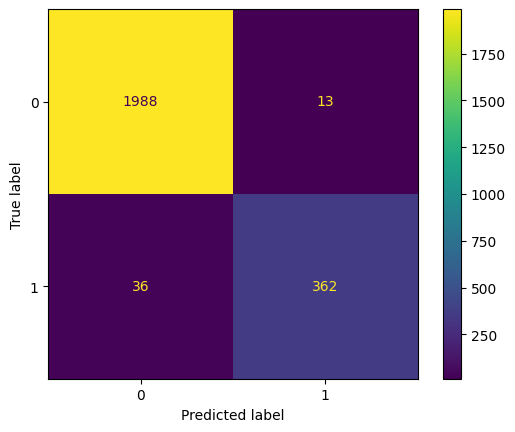

In [551]:
#Create confusion matrix of the prediction
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred_xgb, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

## Plot feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

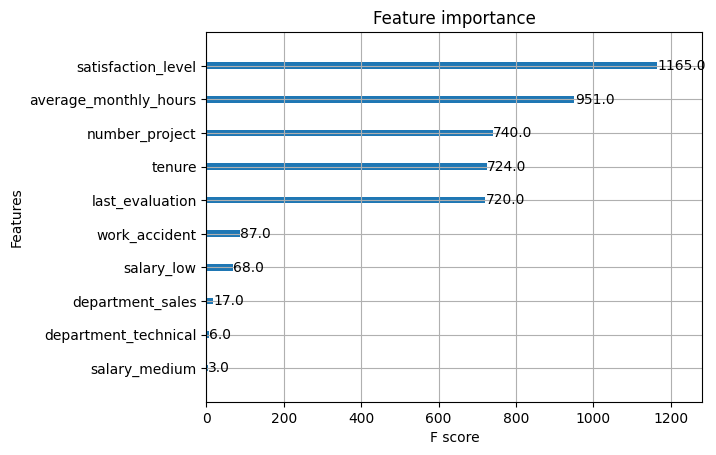

In [543]:
plot_importance(xgb_cv1.best_estimator_, max_num_features=10)